# Chest X-Ray Images (Pneumonia)

## Dataset downloaded from the kaggle website

In [ ]:
#installation_package_kaggle
! pip install -q kaggle 

In [ ]:
#création_d'un_dossier_kaggle
! mkdir ~/.kaggle/

In [ ]:
#copier_kaggle_json_dans_dossier_kaggle
! cp '/content/drive/MyDrive/kaggle/kaggle.json' ~/.kaggle/

cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory


In [ ]:
#donner_les_droits_a_kaggle
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# Liste de bases de données_des_compétitions
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
#importer_data
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
#unzip_data
! unzip /content/chest-xray-pneumonia.zip -d pneumonia_data

## Initialization

In [ ]:
#libraries
import cv2
import os
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import keras.backend as k

In [ ]:
#deep_learning_libraries
import keras.backend as k
from keras.models import Model , Sequential
from keras.layers import Input , Dense , Flatten, Dropout, BatchNormalization
from keras.layers import  Conv2D, SeparableConv2D , MaxPool2D, LeakyReLU ,Activation
from tensorflow.keras.optimizers import Adam, RMSprop 
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint , EarlyStopping
import tensorflow as tf


import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from matplotlib import path
#simplifier_path

path_principal = '/content/drive/MyDrive/kaggle/pneumonia_data/chest_xray/'
path_train= '/content/drive/MyDrive/kaggle/pneumonia_data/chest_xray/train'
path_val= '/content/drive/MyDrive/kaggle/pneumonia_data/chest_xray/val'
path_test= '/content/drive/MyDrive/kaggle/pneumonia_data/chest_xray/test'

## Data visualization

In [ ]:
#visualisation_image
from matplotlib import path
from os.path import join
#distribution_dataset
from matplotlib.colorbar import constrained_layout

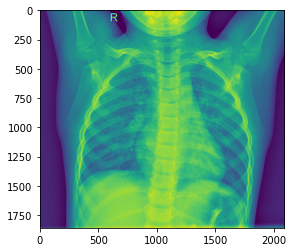

In [ ]:
imagen = plt.imread(os.path.join(path_train, 'NORMAL/IM-0115-0001.jpeg'))
plt.imshow(imagen)


In [ ]:
#taille de l'image de départ
imagen.shape

(1858, 2090)

In [ ]:
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

Images plot

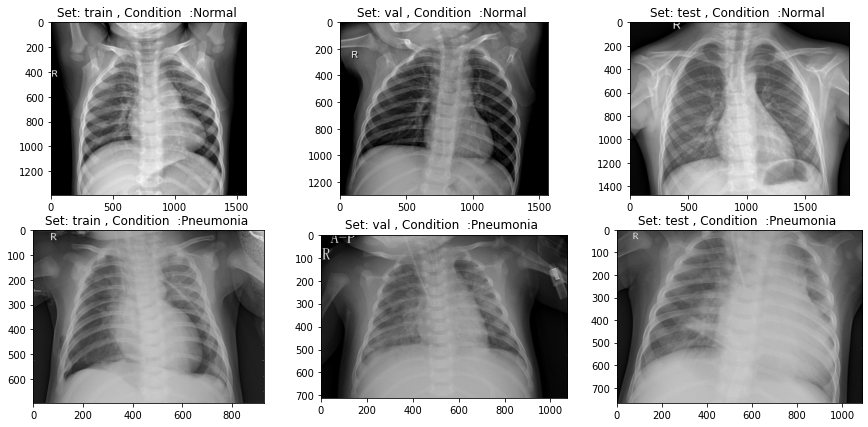

In [ ]:
#preparation_pour_affichage
fig , ax = plt.subplots(2 , 3 , figsize = (15 , 7))
ax = ax.ravel ()
plt.tight_layout


#affichage des exemples d'images à partir de chaque dataset 
for i , _set in enumerate( ['train' , 'val' , 'test']):
 
  set_path = path_principal  +  _set 
  ax[i].imshow(plt.imread(set_path + '/NORMAL/' + os.listdir(set_path + '/NORMAL')[0]) , cmap = 'gray')
  ax[i].set_title('Set: {} , Condition  :Normal ' .format(_set))
  ax[i+3].imshow(plt.imread(set_path + '/PNEUMONIA/' + os.listdir(set_path + '/PNEUMONIA')[0]) , cmap = 'gray')
  ax[i+3].set_title('Set: {} , Condition  :Pneumonia ' .format(_set))

Dataset Distribution

In [ ]:
#distribution
for _set in ['train' , 'val' , 'test' ] :
  n_normal = len(os.listdir(path_principal + _set + '/NORMAL'))
  n_infect = len(os.listdir(path_principal + _set + '/PNEUMONIA'))
  print('Set : {} , normal_images : {} , pneumonia images : {} '.format(_set , n_normal , n_infect))

Set : train , normal_images : 1341 , pneumonia images : 3875 
Set : val , normal_images : 8 , pneumonia images : 8 
Set : test , normal_images : 234 , pneumonia images : 390 


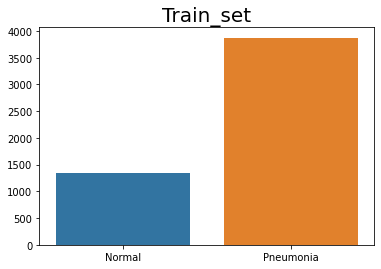

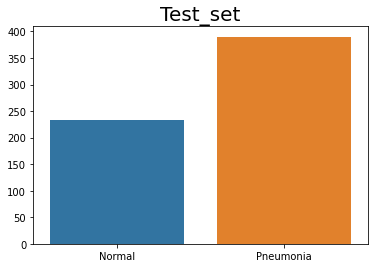

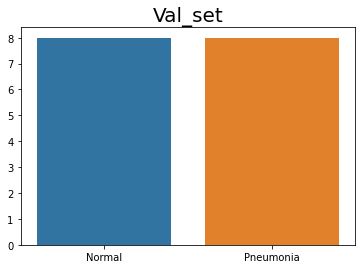

In [ ]:
#utiliser_pandas_pour_visualiser_les_datas
train_plot = pd.DataFrame.from_dict(
    {'Normal': [len([os.path.join(path_principal +'/train/NORMAL', filename) 
                     for filename in os.listdir(path_principal+'/train/NORMAL')])], 
     'Pneumonia': [len([os.path.join(path_principal+'/train/PNEUMONIA', filename) 
                        for filename in os.listdir(path_principal+'/train/PNEUMONIA')])]})


sns.barplot(data=train_plot).set_title('Train_set', fontsize=20)
plt.show()


test_plot = pd.DataFrame.from_dict(
    {'Normal': [len([os.path.join(path_principal +'/test/NORMAL', filename) 
                     for filename in os.listdir(path_principal+'/test/NORMAL')])], 
     'Pneumonia': [len([os.path.join(path_principal +'/test/PNEUMONIA', filename) 
                        for filename in os.listdir(path_principal+'/test/PNEUMONIA')])]})

sns.barplot(data=test_plot).set_title('Test_set', fontsize=20)
plt.show()


val_plot = pd.DataFrame.from_dict(
    {'Normal': [len([os.path.join(path_principal +'/val/NORMAL', filename) 
                     for filename in os.listdir(path_principal+'/val/NORMAL')])], 
     'Pneumonia': [len([os.path.join(path_principal +'/val/PNEUMONIA', filename) 
                        for filename in os.listdir(path_principal +'/val/PNEUMONIA')])]})

sns.barplot(data=val_plot).set_title('Val_set', fontsize=20)
plt.show()

## Data resizing

Definition of labels

In [ ]:
labels = ["NORMAL", "PNEUMONIA"] # each folder has two sub folder name "PNEUMONIA", "NORMAL"
IMG_SIZE = 256 # resize image

def get_data_train(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)


In [ ]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in (get_data_train(path_train)):
    X_train.append(feature)
    y_train.append(label)

for feature, label in (get_data_train(path_test)):
    X_test.append(feature)
    y_test.append(label)
    
for feature, label in (get_data_train(path_val)):
    X_val.append(feature)
    y_val.append(label)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


Normalization

In [ ]:
X_train_norm = np.array(X_train) / 255.0
X_val_norm = np.array(X_val) / 255.0
X_test_norm = np.array(X_test) / 255.0


type(X_train_norm)

numpy.ndarray

In [ ]:
X_train_norm.shape

(5216, 256, 256)

Reshaping the normalized images

In [ ]:
X_train_norm_reshape = X_train_norm.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train_norm_reshape = np.array(y_train)

X_val_norm_reshape = X_val_norm.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val_norm_reshape = np.array(y_val)

X_test_norm_reshape = X_test_norm.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test_norm_reshape = np.array(y_test)


type(X_train_norm_reshape)

numpy.ndarray

In [ ]:
X_val_norm_reshape.shape

(16, 256, 256, 1)

Reshaping the unnormalized images

In [ ]:
X_train_array = np.array(X_train) 
X_val_array = np.array(X_val) 
X_test_array = np.array(X_test) 

In [ ]:
X_train_reshape = X_train_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train_reshape = np.array(y_train)

X_val_reshape = X_val_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val_reshape = np.array(y_val)

X_test_reshape = X_test_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test_reshape = np.array(y_test)


type(X_train_reshape)

numpy.ndarray

In [ ]:
X_val_reshape.shape

(16, 256, 256, 1)

Visualization of normilized images

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split, ConcatDataset
import torchvision.transforms as tt

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


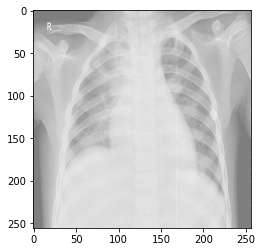

In [ ]:
train_1_sample = DataLoader(X_train_norm, 2, num_workers=4, pin_memory=True, shuffle=True)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize = (4, 4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_1_sample)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))

## Simple CNN for normalized and reshaped images

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 256x256 with 1 byte color
    # This is the first convolution
    tf.keras.layers.Conv2D(8, (1, 1), activation='relu', input_shape=(256, 256, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(16, (1, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(32, (1,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(16, (1,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a CNN
    tf.keras.layers.Flatten(),
    # 16 neuron hidden layer
    tf.keras.layers.Dense(16, activation='relu'),
    # Only 1 output neuron. 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model.fit(X_train_norm_reshape, y_train_norm_reshape, validation_split = 0.2, epochs=10, batch_size=32)

Model evaluation

In [ ]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val loss'], loc='upper left')
plt.show()

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val accuracy'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test_norm_reshape,y_test_norm_reshape)

In [ ]:
pred = model.predict(X_test_norm_reshape,verbose=0)

Confusion matrix

In [ ]:
predictions = model.predict(X_test_norm_reshape)
for i in range(len(predictions)):
    predictions[i] = 1 
    if predictions[i]> 0.5 
    else 0

In [ ]:
print(classification_report(y_test_norm_reshape,predictions, target_names=['Pneumonia (Class 0)', 'Normal (Class 1)']))

In [ ]:
cm = confusion_matrix(y_test,predictions)
cm = pd.DataFrame(cm,index = ['0','1'], columns = ['0','1'])
cm

In [ ]:
sns.heatmap(cm,cmap="Blues",annot=True, xticklabels = labels,yticklabels=labels)
plt.title('Confusion matrix of CNN reshaped and normalized', fontsize = 18)
plt.xlabel('Y_prediction', fontsize = 15)
plt.ylabel('Y_true', fontsize = 15)
plt.show()

##  Simple CNN for reshaped and unnormalized images

In [ ]:
model_r = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 256x256 with 1 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(8, (1,1), activation='relu', input_shape=(256, 256, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(16, (1,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(32, (1,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(16, (1,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a CNN
    tf.keras.layers.Flatten(),
    # 16 neuron hidden layer
    tf.keras.layers.Dense(16, activation='relu'),
    # Only 1 output neuron.
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_r.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 8)       16        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      144       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        544       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0

In [ ]:
model_r.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
history_r = model_r.fit(X_train_reshape, y_train_reshape, validation_split = 0.2, epochs = 8, batch_size = 80)

Model evaluation

In [ ]:
model_r.evaluate(X_test_reshape, y_test_reshape)

20/20 [==============================] - 1s 57ms/step - loss: 0.6665 - accuracy: 0.6250


[0.6664748787879944, 0.625]

In [ ]:
print(history_r.history.keys())
plt.plot(history_r.history['loss'])
plt.plot(history_r.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val loss'], loc='upper left')
plt.show()

In [ ]:
print(history_r.history.keys())
plt.plot(history_r.history['accuracy'])
plt.plot(history_r.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val accuracy'], loc='upper left')
plt.show()

Confusion matrix

In [ ]:
predictions = model.predict(X_test_reshape)
for i in range(len(predictions)):
    predictions[i] = 1 
    if predictions[i]> 0.5 
    else 0

In [ ]:
print(classification_report(y_test_reshape,predictions, target_names=['Pneumonia (Class 0)', 'Normal (Class 1)']))

In [ ]:
cm = confusion_matrix(y_test,predictions)
cm = pd.DataFrame(cm,index = ['0','1'], columns = ['0','1'])
cm

In [ ]:
sns.heatmap(cm,cmap="Blues",annot=True, xticklabels = labels,yticklabels=labels)
plt.title('Confusion matrix of CNN reshaped and normalized', fontsize = 18)
plt.xlabel('Y_prediction', fontsize = 15)
plt.ylabel('Y_true', fontsize = 15)
plt.show()

## Implementation of ResNet

In [ ]:
from glob import glob
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.optimizers import Adam,RMSprop
from keras.losses import BinaryCrossentropy
from keras.applications import ResNet50V2
from keras.callbacks import EarlyStopping

In [ ]:
train_datagen2=ImageDataGenerator(rescale=1.0/255,
                                 rotation_range=30,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2,
                                 )

val_datagen2=ImageDataGenerator(rescale=1.0/255)

test_datagen2=ImageDataGenerator(rescale=1.0/255)

train_generator2=train_datagen2.flow_from_directory(path_train,target_size=(180,180),batch_size=128,class_mode='binary')

val_generator2=val_datagen2.flow_from_directory(path_val,target_size=(180,180),batch_size=128,class_mode='binary')

test_generator2=test_datagen2.flow_from_directory(path_test,target_size=(180,180),batch_size=128,class_mode='binary')

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

pretrained_model2 = ResNet50(weights= None, include_top=False, input_shape= (180,180,1))

#freazing the trained layers
for layers in pretrained_model2.layers:
    layers.trainable = False


In [ ]:
last_layer=pretrained_model2.get_layer('conv5_block3_1_relu')
last_output = last_layer.output

x=tf.keras.layers.Flatten()(last_output)
x=tf.keras.layers.Dense(256,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(128,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(32,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(1,activation='sigmoid')(x)

model2=tf.keras.Model(pretrained_model2.input,x)

model2.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
               metrics=['accuracy','Precision','Recall'])


In [ ]:
model2.summary()

In [ ]:
history2=model2.fit(train_generator2,validation_data=val_generator2,epochs=15,batch_size=16)

In [ ]:
model2.evaluate(test_generator2)

In [ ]:
print(history2.history.keys())
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val loss'], loc='upper left')
plt.show()

In [ ]:
print(history2.history.keys())
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val accuracy'], loc='upper left')
plt.show()

Confusion matrix

In [ ]:
pred = model2.predict(test_generator2)
pred

In [ ]:
y_pred = []
for prob in pred:
    if prob >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred

In [ ]:
y_true = test_generator2.classes
y_true

In [ ]:
x_axis_label = ["normal", "pneumonia"]
y_axis_label = ["normal", "pneumonia"]
cm = confusion_matrix(y_true, y_pred)
sn.heatmap(cm,xticklabels=x_axis_label, yticklabels=y_axis_label, annot=True,cmap="Blues", annot_kws={"size": 16})
plt.title('Confusion matrix of Resnet', fontsize = 18) 
plt.xlabel('Y_Prediction', fontsize = 15) 
plt.ylabel('Y_True', fontsize = 15)